In [32]:
from climada.hazard import Centroids, TropCyclone, TCTracks
from climada.entity import LitPop
from climada.entity.impact_funcs import trop_cyclone
from climada.engine import ImpactCalc


In [95]:
tr_irma = TCTracks.from_ibtracs_netcdf(basin='NA')

IBTrACS.ALL.v04r00.nc: 0.00B [00:01, ?B/s]


ValueError: Error while downloading https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/netcdf. Try to download it manually and put the file in C:\Users\kaibe\climada\data\IBTrACS.ALL.v04r00.nc

15it [01:28,  5.88s/it]                        


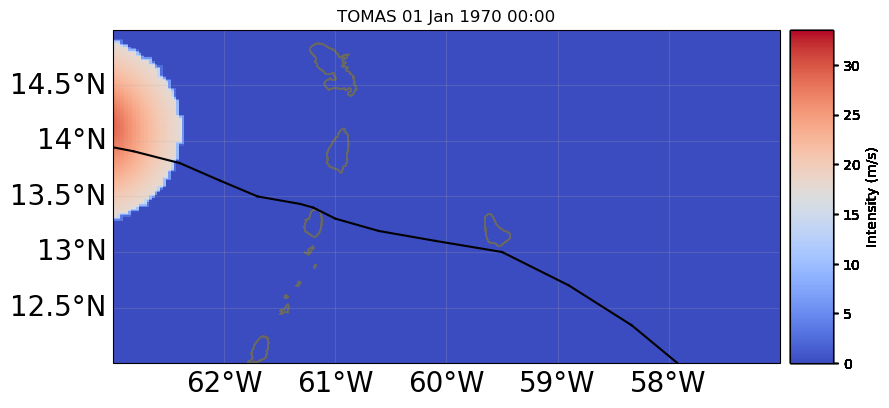

In [31]:
track_name = '2010302N09306'
lon_min, lat_min, lon_max, lat_max = -63.0, 12.0, -57.0, 15.0
centr_video = Centroids.from_pnt_bounds((lon_min, lat_min, lon_max, lat_max), 0.04)
tc_video = TropCyclone()

tc_list, tr_coord = tc_video.video_intensity(track_name, tr_irma, centr_video, cmap='coolwarm',
                                             file_name='C:/Users/kaibe/Documents/ETH_Zurich/Thesis/figures/irma_tc_fl.gif')

<GeoAxes: >

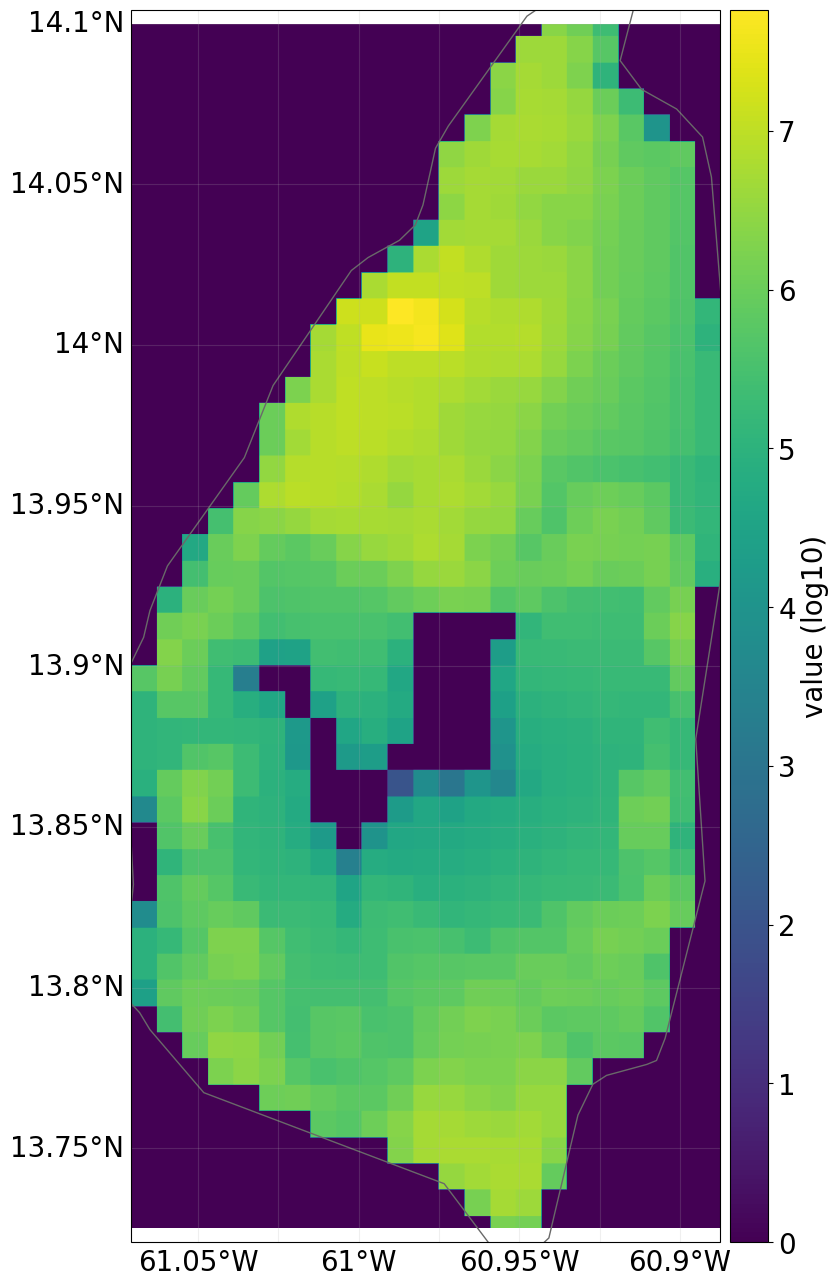

In [58]:
exp_lp = LitPop.from_countries(countries=662, res_arcsec=30, fin_mode='gdp', reference_year=2020)
exp_lp.check()
exp_lp.plot_raster()

In [84]:
lat = exp_lp.gdf['latitude'].values
lon = exp_lp.gdf['longitude'].values
centrs = Centroids.from_lat_lon(lat, lon)

tc_lucia = TCTracks([tr_irma.get_track(track_name)])


tc_storm = TropCyclone.from_tracks(tc_lucia, centroids=centrs)


C:\Users\kaibe\AppData\Local\Temp\ipykernel_27956\774976883.py:3: DeprecatedWarning: from_lat_lon is deprecated. This method will be removed in a future version. Simply use the constructor instead.
  centrs = Centroids.from_lat_lon(lat, lon)


In [129]:
tc_lucia.data

[<xarray.Dataset> Size: 6kB
 Dimensions:                 (time: 103)
 Coordinates:
   * time                    (time) datetime64[ns] 824B 2010-10-29T06:00:00 .....
     lat                     (time) float32 412B 9.0 9.383 9.8 ... 40.51 42.0
     lon                     (time) float32 412B -53.7 -54.5 ... -53.47 -53.5
 Data variables:
     radius_max_wind         (time) float32 412B 120.0 105.0 90.0 ... 0.0 0.0 0.0
     radius_oci              (time) float32 412B 200.0 225.0 250.0 ... 0.0 0.0
     max_sustained_wind      (time) float32 412B 30.0 32.0 35.0 ... 35.0 35.0
     central_pressure        (time) float32 412B 1.006e+03 1.004e+03 ... 995.0
     environmental_pressure  (time) float64 824B 1.009e+03 1.009e+03 ... 995.0
     time_step               (time) float64 824B 3.0 3.0 3.0 3.0 ... 3.0 3.0 3.0
     basin                   (time) <U2 824B 'NA' 'NA' 'NA' ... 'NA' 'NA' 'NA'
 Attributes:
     max_sustained_wind_unit:  kn
     central_pressure_unit:    mb
     orig_event_flag:   

In [140]:
from time import gmtime, strftime
import numpy as np
tc_lucia.data[0].time[1].values

numpy.datetime64('2010-10-29T09:00:00.000000000')

In [143]:
j = np.arange(0.23, 2, 0.001)
for i in j:
    print(strftime("%d %h %Y %H:%M", gmtime((tc_lucia.data[0].time[1].values.astype(int)))))

20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 2020 23:47
20 Jun 202

In [120]:
print(i)

0


In [92]:
impact_func_set = trop_cyclone.ImpfSetTropCyclone()
impf_set = impact_func_set.from_calibrated_regional_ImpfSet()
impf_set.check()
# get mapping: country ISO3n per region:
iso3n_per_region = impf_id_per_region = impact_func_set.get_countries_per_region()[2]

code_regions = {'NA1': 1, 'NA2': 2, 'NI': 3, 'OC': 4, 'SI': 5, 'WP1': 6, \
                'WP2': 7, 'WP3': 8, 'WP4': 9, 'ROW': 10}
# match exposure with correspoding impact function
for calibration_region in impf_id_per_region:
    for country_iso3n in iso3n_per_region[calibration_region]:
        exp_lp.gdf.loc[exp_lp.gdf.region_id== country_iso3n, 'impf_TC'] = code_regions[calibration_region]
#perform impact calcualtion
imp = ImpactCalc(exp_lp, impf_set, tc_storm).impact(save_mat=True)

In [93]:
imp.at_event

array([482787.38443925])